<a href="https://colab.research.google.com/github/itskipronoh/CEMA-TRAINING-/blob/main/CEMA_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/HIV data 2000-2023.csv', encoding='latin1')

df.head()


,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,Value
0,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2023,320 000 [280 000 - 380 000]
1,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2022,320 000 [280 000 - 380 000]
2,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2021,320 000 [280 000 - 380 000]
3,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2020,320 000 [280 000 - 370 000]
4,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2015,300 000 [260 000 - 350 000]


visualization that shows the trend of HIV cases in the countries that contribute to 75% of the global burden

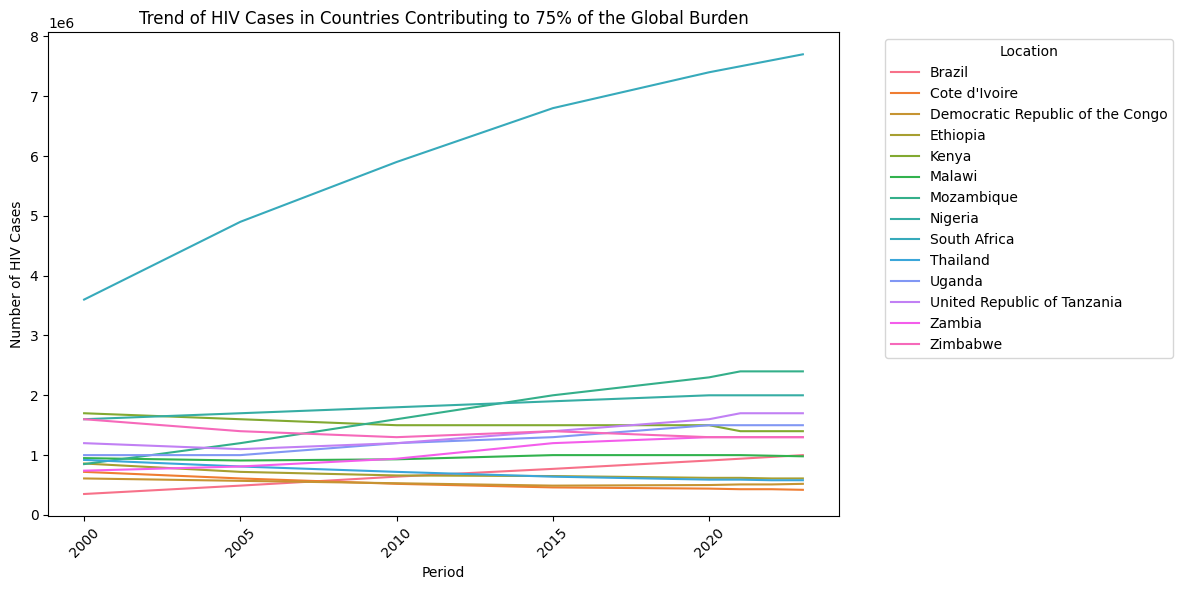

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

global_cases_by_Period = df.groupby('Period')['Estimate'].sum()
Location_cumulative_cases = df.groupby('Location')['Estimate'].sum()
threshold = 0.75 * Location_cumulative_cases.sum()
top_countries = Location_cumulative_cases.sort_values(ascending=False).cumsum()
top_countries = top_countries[top_countries <= threshold].index.tolist()
df_top_countries = df[df['Location'].isin(top_countries)]

hiv_trend = df_top_countries.groupby(['Location', 'Period'])['Estimate'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Period', y='Estimate', hue='Location', data=hiv_trend)
plt.title('Trend of HIV Cases in Countries Contributing to 75% of the Global Burden')
plt.xlabel('Period')
plt.ylabel('Number of HIV Cases')
plt.xticks(rotation=45)
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


visualization that displays the trend of HIV cases in the countries contributing to 75% of the burden within each WHO region (column called ParentLocationCode contains the WHO regions)

<ipython-input-14-c1204a395ddb>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_countries = region_data[cumulative_sum <= threshold]['Location'].tolist()
<ipython-input-14-c1204a395ddb>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_countries = region_data[cumulative_sum <= threshold]['Location'].tolist()
<ipython-input-14-c1204a395ddb>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_countries = region_data[cumulative_sum <= threshold]['Location'].tolist()
<ipython-input-14-c1204a395ddb>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_countries = region_data[cumulative_sum <= threshold]['Location'].tolist()
<ipython-input-14-c1204a395ddb>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_countries = region_data[cumulative_sum <= threshold]['Location'].tolist()
<ipython-input-14-c1204a395ddb>:21: User

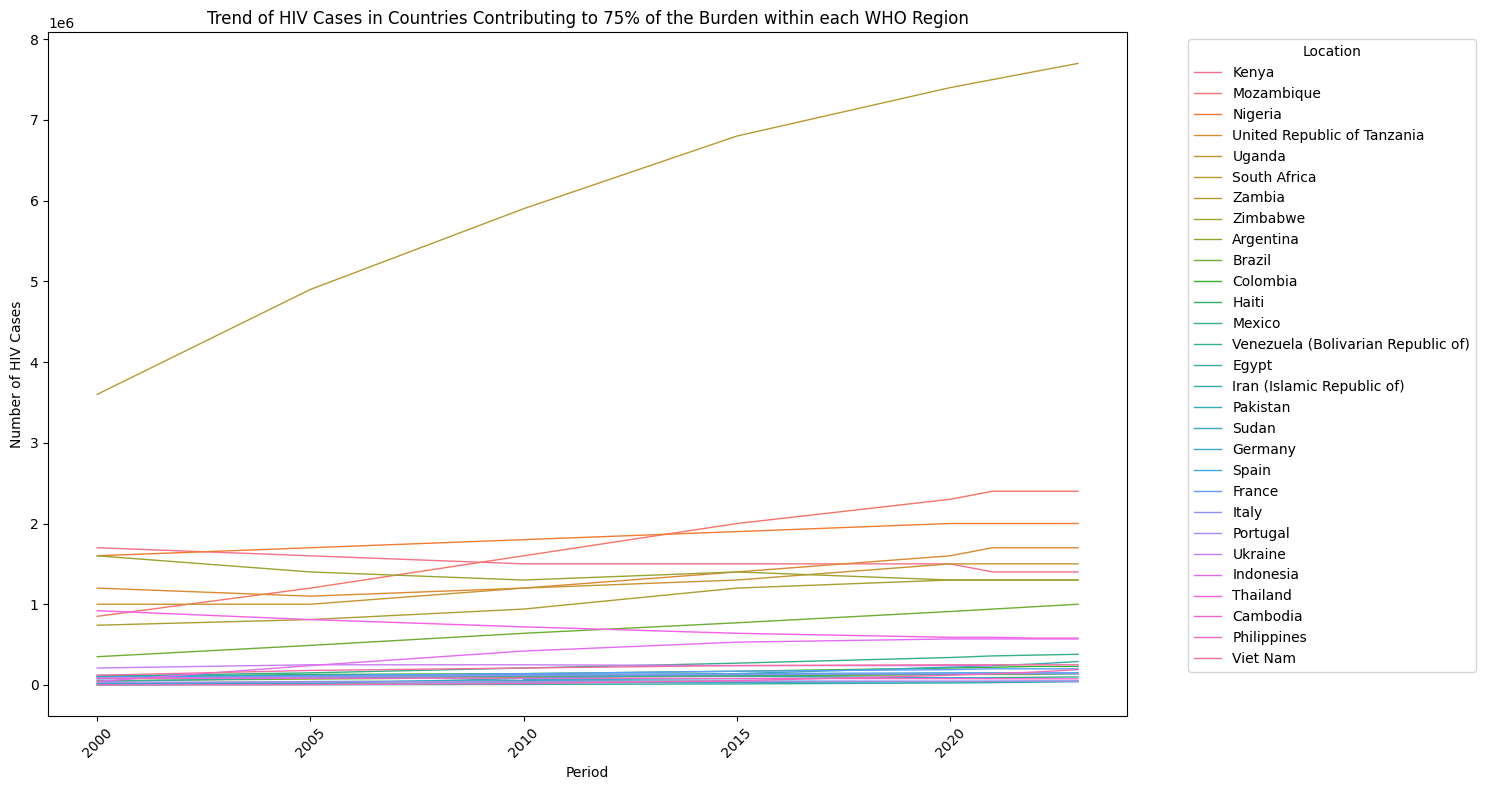

In [ ]:

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
region_country_cases = df.groupby(['ParentLocationCode', 'Location'])['Estimate'].sum().reset_index()
region_total_cases = region_country_cases.groupby('ParentLocationCode')['Estimate'].sum()
def get_top_countries_by_region(region_data, threshold_percentage=0.75):
    region_total = region_data['Estimate'].sum()
    threshold = region_total * threshold_percentage
    cumulative_sum = region_data.sort_values(by='Estimate', ascending=False)['Estimate'].cumsum()
    top_countries = region_data[cumulative_sum <= threshold]['Location'].tolist()
    return top_countries
top_countries_by_region = {}
for region, region_df in region_country_cases.groupby('ParentLocationCode'):
    top_countries_by_region[region] = get_top_countries_by_region(region_df)
df_top_countries_by_region = df[df.apply(lambda row: row['Location'] in top_countries_by_region.get(row['ParentLocationCode'], []), axis=1)]


plt.figure(figsize=(15, 8))
sns.lineplot(x='Period', y='Estimate', hue='Location', data=df_top_countries_by_region, units='ParentLocationCode', estimator=None, lw=1)
plt.title('Trend of HIV Cases in Countries Contributing to 75% of the Burden within each WHO Region')
plt.xlabel('Period')
plt.ylabel('Number of HIV Cases')
plt.xticks(rotation=45)
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Merge this multidimensional_poverty with the HIV data above and analyze the relationship between people living with HIV and multidimensional poverty, and the individual factors that contribute to the ratio.

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Step 2: Load datasets
# Load HIV data

# Step 2: Load datasets
hiv_df = pd.read_csv('/content/HIV data 2000-2023.csv', encoding='latin1')
poverty_df = pd.read_excel('/content/multidimensional_poverty.xlsx')


# Step 3: Merge datasets
# Merge on 'Location' (country) and 'Period' (year)
# merged_df = pd.merge(hiv_df, poverty_df, on=['Economy', 'Reporting year'], how='inner')
merged_df = pd.merge(
    hiv_df,
    poverty_df,
    left_on=['Location', 'Period'],
    right_on=['Region', 'Reporting year'],
    how='inner'
)

# Step 4: Data cleaning
# Drop rows with missing values
merged_df.dropna(inplace=True)

# (Optional) Check the columns
print(merged_df.columns)

# Step 5: Build Mixed Effects Model
# Let's assume your poverty dataset has these important columns:
# 'Multidimensional Poverty Index', 'Income', 'Educational Attainment', 'School Enrollment', 'Electricity Access', 'Sanitation', 'Drinking Water'

# If the column names are different, adjust them below.

model = smf.mixedlm(
    formula="Estimate ~ `Multidimensional Poverty Index` + Income + `Educational Attainment` + `School Enrollment` + `Electricity Access` + Sanitation + `Drinking Water`",
    data=merged_df,
    groups=merged_df["Location"],          # Random intercept by Country
    re_formula="~Period"                    # Random slope by Year
)

result = model.fit()
print(result.summary())

# Step 6: Simple Visualization
# Scatter plot of HIV Cases vs Multidimensional Poverty Index
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='Multidimensional Poverty Index', y='Estimate', hue='Location', legend=False)
plt.title('Relationship between Multidimensional Poverty and HIV Cases')
plt.xlabel('Multidimensional Poverty Index')
plt.ylabel('Number of People Living with HIV')
plt.grid(True)
plt.show()


KeyError: 'Region'

In [ ]:
# prompt: You are provided with data on the under-five mortality rate and neonatal mortality rate for the African region, which has been downloaded from the UN Inter-agency Group for Child Mortality Estimation.Filter data for the eight countries belonging to the East African Community

# Filter for East African Community countries
eac_countries = ['Burundi', 'Kenya', 'Rwanda', 'South Sudan', 'Tanzania', 'Uganda', 'Democratic Republic of the Congo', 'Somalia']
eac_df = df[df['Location'].isin(eac_countries)]

# Display the filtered data
eac_df


NameError: name 'df' is not defined

In [ ]:
import pandas as pd

# Step 1: Load both datasets
under_five_mortality_df = pd.read_csv('/content/under_five_mortality.csv')  # Adjust path
neonatal_mortality_df = pd.read_csv('/content/neonatal_mortality.csv')      # Adjust path

# Step 2: List of East African Community countries
eac_countries = [
    'Burundi', 'Kenya', 'Rwanda', 'South Sudan',
    'Tanzania', 'Uganda', 'Democratic Republic of the Congo', 'Somalia'
]

# Step 3: Check the columns to confirm the country name column
print(under_five_mortality_df.columns)
print(neonatal_mortality_df.columns)

# Step 4: Assuming the country column is called 'Location' (adjust if needed)

# Filter under-five mortality dataset
under_five_mortality_eac = under_five_mortality_df[under_five_mortality_df['Location'].isin(eac_countries)]

# Filter neonatal mortality dataset
neonatal_mortality_eac = neonatal_mortality_df[neonatal_mortality_df['Location'].isin(eac_countries)]

# Step 5: View the results
print("\nFiltered Under-Five Mortality Data:")
print(under_five_mortality_eac)

print("\nFiltered Neonatal Mortality Data:")
print(neonatal_mortality_eac)

# Optional: Save filtered datasets
# under_five_mortality_eac.to_csv('/content/under_five_mortality_eac.csv', index=False)
# neonatal_mortality_eac.to_csv('/content/neonatal_mortality_eac.csv', index=False)


Index(['REF_AREA', 'Geographic area', 'INDICATOR', 'Indicator', 'SEX', 'Sex',
       'WEALTH_QUINTILE', 'Wealth Quintile', 'SERIES_NAME', 'Series Name',
       'SERIES_YEAR', 'Series Year', 'REGIONAL_GROUP', 'Regional group',
       'TIME_PERIOD', 'OBS_VALUE', 'COUNTRY_NOTES', 'CONNECTION',
       'DEATH_CATEGORY', 'CATEGORY', 'OBS_STATUS', 'Observation Status',
       'UNIT_MEASURE', 'Unit of measure', 'SERIES_CATEGORY', 'Series Category',
       'SERIES_TYPE', 'Series Type', 'STD_ERR', 'REF_DATE',
       'AGE_GROUP_OF_WOMEN', 'Age Group of Women', 'TIME_SINCE_FIRST_BIRTH',
       'Time Since First Birth', 'DEFINITION', 'INTERVAL', 'SERIES_METHOD',
       'Series Method', 'LOWER_BOUND', 'UPPER_BOUND', 'STATUS',
       'YEAR_TO_ACHIEVE', 'MODEL', 'Model Used'],
      dtype='object')
Index(['REF_AREA', 'Geographic area', 'INDICATOR', 'Indicator', 'SEX', 'Sex',
       'WEALTH_QUINTILE', 'Wealth Quintile', 'SERIES_NAME', 'Series Name',
       'SERIES_YEAR', 'Series Year', 'REGIONAL_GROUP'

KeyError: 'Location'